In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use the merged data frame from Assignment 1 for this assignment.
This Assignment focuses on data preprocessing and model building. 
Continue with the datasets loaded in Assignment 1 (or reload with same steps and create merged data frame). 
You will be predicting PM2.5 levels using a machine learning model in this assignment.

In [2]:
df_airq =pd.read_csv(r'c:\Users\nitin\OneDrive\Documents\merged_csv.csv')

In [3]:
df_airq.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [4]:
#Rename the columns name
df_airq1=df_airq.rename(columns={"wd": "wind_direction","DEWP": "dew_point_temp" ,"TEMP": " temp","RAIN": "rain","WSPM":"wind_speed","PRES":"pressure"})

In [5]:
#view top 3 rows and recheck if column name changes have taken effect
df_airq1.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [6]:
df_airq1.shape

(420768, 18)

In [7]:
df_airq1['station'].value_counts()

Dongsi           35064
Wanshouxigong    35064
Gucheng          35064
Guanyuan         35064
Tiantan          35064
Aotizhongxin     35064
Shunyi           35064
Changping        35064
Nongzhanguan     35064
Dingling         35064
Wanliu           35064
Huairou          35064
Name: station, dtype: int64

# Taking random sample of data set 10 percent

In [8]:
df_aq =df_airq1.groupby('station', group_keys=False).apply(lambda x: x.sample(3564))

In [9]:
df_aq.shape

(42768, 18)

In [10]:
df_aq['station'].value_counts()

Dingling         3564
Tiantan          3564
Dongsi           3564
Wanliu           3564
Shunyi           3564
Wanshouxigong    3564
Changping        3564
Huairou          3564
Nongzhanguan     3564
Gucheng          3564
Guanyuan         3564
Aotizhongxin     3564
Name: station, dtype: int64

# Importing the necessary libraries

In [11]:
# Importing the necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from numpy import absolute, mean, std 
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import learning_curve


# Data preprocessing  removing missing valus and outlier etc

In [12]:
# dropping unnecessary columns red
df_aq.drop(['No' ], axis = 1, inplace = True)

In [13]:

#check the type of columns in dataframe
df_aq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42768 entries, 11673 to 406661
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42768 non-null  int64  
 1   month           42768 non-null  int64  
 2   day             42768 non-null  int64  
 3   hour            42768 non-null  int64  
 4   PM2.5           41887 non-null  float64
 5   PM10            42101 non-null  float64
 6   SO2             41887 non-null  float64
 7   NO2             41560 non-null  float64
 8   CO              40672 non-null  float64
 9   O3              41423 non-null  float64
 10   temp           42736 non-null  float64
 11  pressure        42738 non-null  float64
 12  dew_point_temp  42736 non-null  float64
 13  rain            42739 non-null  float64
 14  wind_direction  42593 non-null  object 
 15  wind_speed      42743 non-null  float64
 16  station         42768 non-null  object 
dtypes: float64(11), int64(4), 

In [14]:
#check for missing values 
df_aq.isnull().sum() 

year                 0
month                0
day                  0
hour                 0
PM2.5              881
PM10               667
SO2                881
NO2               1208
CO                2096
O3                1345
 temp               32
pressure            30
dew_point_temp      32
rain                29
wind_direction     175
wind_speed          25
station              0
dtype: int64

In [15]:
#remoivng missing values
df3_air= df_aq.dropna()

In [16]:
#Again checking for missing values
df3_air.isnull().sum()

year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
 temp             0
pressure          0
dew_point_temp    0
rain              0
wind_direction    0
wind_speed        0
station           0
dtype: int64

In [17]:
#removing outlier in target dataset.
Q1=df3_air['PM2.5'].quantile(0.25)
Q3=df3_air['PM2.5'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
df_out=pd.DataFrame()
df_out=df3_air[(df3_air['PM2.5']<(Q1-1.5*IQR))|(df3_air['PM2.5']>(Q3+1.5*IQR))]
print(df_out.shape)
df3_air=df3_air[~((df3_air['PM2.5']<(Q1-1.5*IQR))|(df3_air['PM2.5']>(Q3+1.5*IQR)))]
df3_air.shape

90.0
(1899, 17)


(37044, 17)

# 2.Remove variables if you find multicollinearity between independent variables.

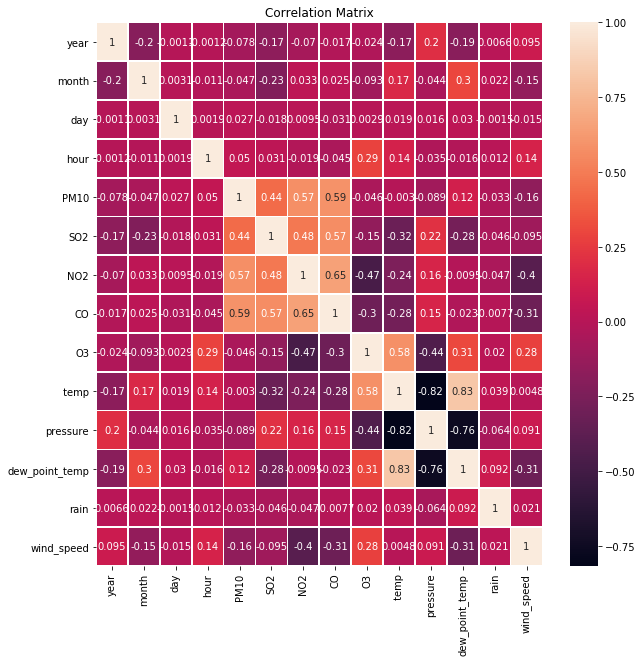

In [18]:
#checking the relation between independent variables

plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(df3_air.iloc[:,df3_air.columns != 'PM2.5'].corr(), annot=True, linewidth = 0.75)
plt.show()

#In this  data set dew point temerature and rain , 
temp and dew point temp are higly positively correlated so i will keep the dew point temrature and drop rain and tem for the data set.

In [19]:
df3_air.head(3)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
11673,2014,6,30,9,68.0,68.0,8.0,70.0,1600.0,104.0,30.3,1000.9,19.0,0.0,SE,0.8,Aotizhongxin
3524,2013,7,25,20,70.0,169.0,30.0,58.0,1300.0,186.0,30.0,996.5,22.4,0.0,SSW,0.8,Aotizhongxin
28714,2016,6,9,10,170.0,170.0,12.0,41.0,1500.0,100.0,27.5,1002.9,17.1,0.0,S,1.6,Aotizhongxin


In [20]:
#now removing  correlated columns
df4_air= df3_air.drop(df3_air.columns[[10,13]], axis=1)

In [21]:
df4_air.head(3)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,pressure,dew_point_temp,wind_direction,wind_speed,station
11673,2014,6,30,9,68.0,68.0,8.0,70.0,1600.0,104.0,1000.9,19.0,SE,0.8,Aotizhongxin
3524,2013,7,25,20,70.0,169.0,30.0,58.0,1300.0,186.0,996.5,22.4,SSW,0.8,Aotizhongxin
28714,2016,6,9,10,170.0,170.0,12.0,41.0,1500.0,100.0,1002.9,17.1,S,1.6,Aotizhongxin


# Reindex the columns such that target variable(PM2.5) should be at the last in the column index

In [22]:
df4_air.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'pressure', 'dew_point_temp', 'wind_direction', 'wind_speed',
       'station'],
      dtype='object')

In [23]:
#reindexing to make sure PM2.5 is the last column
df5_air= df4_air.reindex(columns = ['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'pressure', 'dew_point_temp',  'wind_direction',
       'wind_speed', 'station', 'PM2.5'])

In [24]:
df5_air.columns

Index(['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
       'pressure', 'dew_point_temp', 'wind_direction', 'wind_speed', 'station',
       'PM2.5'],
      dtype='object')

# • Make an 80-20 stratified split based on the target data

In [25]:
#Independent variables and dependent variables and placed them into X and y respectively from the final dataset.
# "pm2.5"  it will be the target variable and placing it in a new variable y.
X = df5_air.drop(['PM2.5'],axis =1 )
Y = df5_air['PM2.5']


In [26]:
 #Stratified 80-20 train test split and keeping shuffle parameter true
x_train, x_test, y_train, y_test = train_test_split( X,Y,
                        shuffle = True, test_size=0.2, stratify =X['station'])

In [27]:
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (29635, 14) (29635,)
Test (7409, 14) (7409,)


# Preprocess the data (Encode the categorical features and Standardize the numerical features) of merged dataset

In [28]:
# assigning preprocessing modules to variables
scaler = StandardScaler()
le = LabelEncoder() 

In [31]:
# Fitting the categorical variables using label_encoder on the train and test data
x_train_sklern = x_train.copy()
x_test_sklern = x_test.copy()

x_train['wind_direction']= le.fit_transform(x_train['wind_direction']) 
x_train['station']= le.fit_transform(x_train['station']) 

x_test['wind_direction']= le.fit_transform(x_test['wind_direction']) 
x_test['station']= le.fit_transform(x_test['station']) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [32]:
x_train_sklern.head() 

,year,month,day,hour,PM10,SO2,NO2,CO,O3,pressure,dew_point_temp,wind_direction,wind_speed,station
12879,2014,8,19,15,98.0,5.0,25.0,600.0,210.0,1003.4,18.7,12,2.1,0
135887,2016,8,30,23,95.0,5.0,61.0,1000.0,89.0,996.8,16.7,4,1.6,3
382502,2016,10,18,14,207.0,6.0,87.0,1800.0,10.0,1012.7,13.1,4,1.4,10
291775,2014,6,13,7,62.0,2.0,46.0,500.0,17.0,1005.4,18.0,3,1.5,8
30727,2016,9,1,7,35.0,4.0,36.0,300.0,36.0,991.2,0.7,6,2.1,0


In [33]:
## Fitting the numerical variables using StandardScaler on the train and test data

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns )
x_test =  pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns )

# • Build a stochastic gradient descent regressor, train the model

In [34]:
# using stochastic gradient descent regressor to train the model
sgd = linear_model.SGDRegressor(shuffle=False)
type(sgd)

sklearn.linear_model._stochastic_gradient.SGDRegressor

In [35]:
# Fitting the data
sgd.fit(x_train, y_train)  

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Here I am using the default values for the SGDRegressor. Increasing the validation_fraction and setting more data aside
for validation is increasing the error.Hence it is best kept to default. The squared_loss in the learning setting helps 
to predict a real valued variable y. It will help to minimize the average arror of squares. 
We are not implementing any feature selection and used the default l2 in the first case.

In [36]:
# Predicting the y values using train and test data
y_pred = sgd.predict(x_test)
y_train_pred = sgd.predict(x_train)

# Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

In [37]:
# Printing the Model score, mean absolute/square errors  & RMSE for train and test predictions 
print("Model Score: %.2f" % sgd.score(x_test, y_test))
print ("MAE on Test: %.2f" %mean_absolute_error(y_test, y_pred))
print ("MAE on Train: %.2f" %mean_absolute_error(y_train, y_train_pred))
print("MSE on Train: %.2f" % mean_squared_error(y_train, y_train_pred))
print("MSE on Test: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 on train:', r2_score(y_train, y_train_pred))
print('R2 on test:', r2_score(y_test, y_pred))


Model Score: 0.78
MAE on Test: 18.79
MAE on Train: 18.24
MSE on Train: 692.14
MSE on Test: 748.02
R2 on train: 0.7865516109708995
R2 on test: 0.7816167287390363


 There are few differences between MAE & MSE
Mean absolute Error (MAE): It does not account for the direction of the value. 
Even if value is negative, positive value is used for calculation. MAE is less 
biased for higher values. It may not adequately reflect the performance when dealing
 with large error values. MAE is less than RMSE as the sample size goes up.
Mean square Error (MSE) it does account for positive or negative value. RMSE  share 
many properties with MSE because RMSE is simply the square root of MSE. MSE is highly biased
for higher values. If you have outlier in the data and you want to ignore them, MAE is a better
option but this data we removed outlier but still I will choose MAE over MSE.

 


# List the hyper-parameters that can be tuned in SGD. 

comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and 
why this value was chosen. Show the improvement you achieved in model accuracy.

In [38]:
# using  custom sgd regressor
sgd = linear_model.SGDRegressor(alpha = .0001,
                                loss = 'epsilon_insensitive', 
                                epsilon = 6,
                                max_iter=10000, 
                                penalty='l1',
                                learning_rate='adaptive', eta0 = .1, power_t = .1)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print ("Mean Absolute Test Error: %.2f" %mean_absolute_error(y_test, y_pred))
print("MSE on Test: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 on test:', r2_score(y_test, y_pred))

Mean Absolute Test Error: 18.10
MSE on Test: 763.41
R2 on test: 0.777124499361258


In the above tuning, we observe that changing the loss function to epsilon_insensitive, which helps to focus more on linear loss than squared loss after a certain point(epsilon). It helps in ignoring errors upto a certain distance and we have increased the default value of .1 to 6. Changing the penalty from l2 to l1 allows feature selection to bring sparsity to the model and explore the data. Also, doing adaptive learning and setting the initial learning rate eta0 to .1 has helped us reduce the overall MAE & r2 compared to default . Since the data is randomized during after each SGD run, it is best to not mention the numerical values. We observe that these hyper-parameter tuning allowed us to reduce the error.

Learning rate, batch size and momentum are three important hyperparameters in the SGD algorithm
Grid search
Grid search is arguably the most basic hyperparameter tuning method. With this technique, we simply build a model for each possible combination of all of the hyperparameter values provided, evaluating each model, and selecting the architecture which produces the best results
Random search
Random search differs from grid search in that we longer provide a discrete set of values to explore for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values may be randomly sampled.
Batch gradient  can also be used.
